In [1]:
import pandas as pd
from numpy import *
import math
import matplotlib.pyplot as plt


In [4]:
dataSet = pd.read_csv("./data/lending-club-loan-data/loan.csv", sep=",")
print(dataSet.shape)
dataSet.head()

# dataSet = dataSet.sample(n=1000000, random_state=3)

C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(dataSet.shape)
# dataSet[~dataSet["id"].isnull()].head()

dataSet[["loan_amnt", "funded_amnt", "funded_amnt_inv", "term"]].head()

# dataSet.loc[dataSet.loan_amnt == 2500, "loan_amnt"].head()

(2260668, 145)


,loan_amnt,funded_amnt,funded_amnt_inv,term
0,2500,2500,2500.0,36 months
1,30000,30000,30000.0,60 months
2,5000,5000,5000.0,36 months
3,4000,4000,4000.0,36 months
4,30000,30000,30000.0,60 months


In [6]:
print(set(dataSet["term"]))
dataSet[["term"]].head()

# data-format: 
# attribute term


for num, value in enumerate(set(dataSet["term"]), start=0):
    dataSet.loc[dataSet.term == value, "term"] = num
    
print(set(dataSet["term"]))
# 0: 36 months
# 1: 60 months

{' 36 months', ' 60 months'}
{0, 1}


In [7]:
categorical_attrs = dataSet.select_dtypes(include=['category', object])
display(categorical_attrs.columns.values)

print("grade")
print(categorical_attrs["grade"].value_counts())

for num, value in enumerate(set(dataSet["grade"]), start=0):
    dataSet.loc[dataSet.grade == value, "grade"] = num
    
print(set(dataSet["grade"]))
print(set(categorical_attrs["grade"]))
print(dataSet["grade"].value_counts())



print("emp_length")
print(categorical_attrs["emp_length"].value_counts())
print(set(categorical_attrs["emp_length"].values))

array(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason',
       'hardship_status', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_loan_status',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status',
       'settlement_date'], dtype=object)

grade
B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64
{0, 1, 2, 3, 4, 5, 6}
{'G', 'A', 'B', 'F', 'C', 'E', 'D'}
2    663557
4    650053
1    433027
6    324424
5    135639
3     41800
0     12168
Name: grade, dtype: int64
emp_length
10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64
{nan, '10+ years', '2 years', '6 years', '8 years', '7 years', '5 years', '1 year', '9 years', '3 years', '< 1 year', '4 years'}


In [8]:
def discretize_column_emp_length(x):
    if x == '10+ years':
        return 10
    elif x == "1 year":
        return 1
    elif x == "2 years":
        return 2
    elif x == "3 years":
        return 3
    elif x == "4 years":
        return 4
    elif x == "5 years":
        return 5
    elif x == "6 years":
        return 6
    elif x == "7 years":
        return 7
    elif x == "8 years":
        return 8
    elif x == "9 years":
        return 9
    elif x == "< 1 year":
        return 0
    else:
        return -1
    
#apply function into column
dataSet.emp_length = dataSet.emp_length.apply(discretize_column_emp_length)

In [7]:
print("emp_length")
# print(categorical_attrs["emp_length"].value_counts())
print(set(dataSet["emp_length"]))

#  Discretize the values in column 'emp_length' such that each occurrence of the value is not “10+ years” is substituted 
# by 0 and all other values in column '10+ years' are substituted by 1.

# o_grt_10_years = len(dataSet.emp_length[dataSet.emp_length=='10+ years'])
# o_les_10_years = len(dataSet.emp_length[dataSet.emp_length != '10+ years'])

# print('Before number of row with >10 years value: ', o_grt_10_years)
# print('Before number of row with <10 years value: ', o_les_10_years)

# def discretize_column_emp_length(x):
#     if x == '10+ years':
#         return 1
#     else:
#         return 0



# #apply function into column
# dataSet.emp_length = dataSet.emp_length.apply(discretize_column_emp_length)

# n_grt_10_years = len(dataSet.emp_length[dataSet.emp_length==1])
# n_les_10_years = len(dataSet.emp_length[dataSet.emp_length == 0])

# print('After number of row with normal attack value: ', n_grt_10_years)
# print('After number of row with other attack value: ', n_les_10_years)

dataSet.emp_length.value_counts()

emp_length
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}


 10    748005
 2     203677
 0     189988
 3     180753
 1     148403
-1     146907
 5     139698
 4     136605
 6     102628
 7      92695
 8      91914
 9      79395
Name: emp_length, dtype: int64

In [9]:
print(dataSet["verification_status"].value_counts())

for num, value in enumerate(set(dataSet["verification_status"]), start=0):
    dataSet.loc[dataSet.verification_status == value, "verification_status"] = num
    
print(set(dataSet["verification_status"]))
print(set(categorical_attrs["verification_status"]))


Source Verified    886231
Not Verified       744806
Verified           629631
Name: verification_status, dtype: int64
{0, 1, 2}
{'Source Verified', 'Verified', 'Not Verified'}


In [24]:
print(set(categorical_attrs["home_ownership"]))
print(categorical_attrs["home_ownership"].value_counts())

for num, value in enumerate(set(dataSet["home_ownership"]), start=0):
    dataSet.loc[dataSet.home_ownership == value, "home_ownership"] = num

print(set(dataSet["home_ownership"]))
print(set(categorical_attrs["home_ownership"]))
print(dataSet["home_ownership"].value_counts())


{'MORTGAGE', 'OTHER', 'ANY', 'RENT', 'NONE', 'OWN'}
MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64
{0, 1, 2, 3, 4, 5}
{'MORTGAGE', 'OTHER', 'ANY', 'RENT', 'NONE', 'OWN'}
0    1111450
3     894929
5     253057
2        996
1        182
4         54
Name: home_ownership, dtype: int64


In [10]:
#discretization: convert numerical variable into interval - bins
numerical_attrs = dataSet[dataSet.columns.difference(categorical_attrs)]
display(numerical_attrs["int_rate"].describe())

count    2.260668e+06
mean     1.309291e+01
std      4.832114e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [11]:
# int_rate_quantiles = dataSet["int_rate"].quantile([0.25, 0.5, 0.75])

# bin_labels = [0, 1, 2, 3]
# int_rate_intervals, bin_edges  = pd.qcut(dataSet['int_rate'], q=4, labels=bin_labels, retbins=True)
# print(int_rate_intervals)
# print(bin_edges)


# dataSet["int_rate"] = int_rate_intervals

# print(dataSet["int_rate"].value_counts())


#discretization: convert numerical variable into interval - bins



In [11]:
display(numerical_attrs["annual_inc"].describe())

count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [25]:

selected_attr = dataSet[["loan_amnt", "funded_amnt", "funded_amnt_inv", "annual_inc", "term", "int_rate", "grade", "emp_length", "verification_status", "home_ownership"]]

print(selected_attr.shape)
display(selected_attr.head())

(2260668, 10)


,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status,home_ownership
0,2500,2500,2500.0,55000.0,0,13.56,4,10,2,3
1,30000,30000,30000.0,90000.0,1,18.94,6,10,0,0
2,5000,5000,5000.0,59280.0,0,17.97,6,6,0,0
3,4000,4000,4000.0,92000.0,0,18.94,6,10,0,0
4,30000,30000,30000.0,57250.0,1,16.14,4,10,2,0


In [31]:

selected_attr2 = dataSet[["loan_amnt", "funded_amnt", "funded_amnt_inv", "annual_inc", "term", "int_rate", "grade", "emp_length", "verification_status"]]

print(selected_attr2.shape)
display(selected_attr2.head())

(2260668, 9)


,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status
0,2500,2500,2500.0,55000.0,0,13.56,4,10,2
1,30000,30000,30000.0,90000.0,1,18.94,6,10,0
2,5000,5000,5000.0,59280.0,0,17.97,6,6,0
3,4000,4000,4000.0,92000.0,0,18.94,6,10,0
4,30000,30000,30000.0,57250.0,1,16.14,4,10,2


In [32]:
select_3_attr = selected_attr2

print("select_3_attr")
select_3_attr["funded_amnt_inv"] = select_3_attr["funded_amnt_inv"].astype('int32')
display(select_3_attr.head())

select_3_attr


C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status
0,2500,2500,2500,55000.0,0,13.56,4,10,2
1,30000,30000,30000,90000.0,1,18.94,6,10,0
2,5000,5000,5000,59280.0,0,17.97,6,6,0
3,4000,4000,4000,92000.0,0,18.94,6,10,0
4,30000,30000,30000,57250.0,1,16.14,4,10,2


In [32]:
# select_3_attr =select_3_attr.astype('int32')
# print("Convert all to integer")
# select_3_attr.dtypes
# print(select_3_attr.head())
# print(select_3_attr.shape)

In [28]:
# select_3_attr["is_duplicate"]= select_3_attr.duplicated()

# select only 1000 rows:
# select_3_attr = select_3_attr.sample(n=1000000, random_state=3)
selected_attr.shape

display(selected_attr)

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status,home_ownership
0,2500,2500,2500,55000.0,0,13.56,4,10,2,3
1,30000,30000,30000,90000.0,1,18.94,6,10,0,0
2,5000,5000,5000,59280.0,0,17.97,6,6,0,0
3,4000,4000,4000,92000.0,0,18.94,6,10,0,0
4,30000,30000,30000,57250.0,1,16.14,4,10,2,0
...,...,...,...,...,...,...,...,...,...,...
2260663,12000,12000,12000,58000.0,1,14.08,4,10,2,0
2260664,12000,12000,12000,30000.0,1,25.82,5,0,2,0
2260665,10000,10000,10000,64000.0,0,11.99,2,10,0,5
2260666,12000,12000,12000,60000.0,1,21.45,6,-1,2,3


In [33]:
test = select_3_attr[0:10]
display(test)

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status
0,2500,2500,2500,55000.0,0,13.56,4,10,2
1,30000,30000,30000,90000.0,1,18.94,6,10,0
2,5000,5000,5000,59280.0,0,17.97,6,6,0
3,4000,4000,4000,92000.0,0,18.94,6,10,0
4,30000,30000,30000,57250.0,1,16.14,4,10,2
5,5550,5550,5550,152500.0,0,15.02,4,10,2
6,2000,2000,2000,51000.0,0,17.97,6,4,0
7,6000,6000,6000,65000.0,0,13.56,4,10,0
8,5000,5000,5000,53580.0,0,17.97,6,10,0
9,6000,6000,6000,300000.0,0,14.47,4,0,2


In [34]:
test['str_list'] = test.apply(lambda row: ' '.join(row.dropna().astype(str).values.tolist()), axis=1)
test['str_list']

C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    2500.0 2500.0 2500.0 55000.0 0.0 13.56 4.0 10....
1    30000.0 30000.0 30000.0 90000.0 1.0 18.94 6.0 ...
2    5000.0 5000.0 5000.0 59280.0 0.0 17.97 6.0 6.0...
3    4000.0 4000.0 4000.0 92000.0 0.0 18.94 6.0 10....
4    30000.0 30000.0 30000.0 57250.0 1.0 16.14 4.0 ...
5    5550.0 5550.0 5550.0 152500.0 0.0 15.02 4.0 10...
6    2000.0 2000.0 2000.0 51000.0 0.0 17.97 6.0 4.0...
7    6000.0 6000.0 6000.0 65000.0 0.0 13.56 4.0 10....
8    5000.0 5000.0 5000.0 53580.0 0.0 17.97 6.0 10....
9    6000.0 6000.0 6000.0 300000.0 0.0 14.47 4.0 0....
Name: str_list, dtype: object

In [21]:
test2 = select_3_attr[0:10]
display(test2)

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status,home_ownership
0,2500,2500,2500,55000.0,0,13.56,4,10,2,RENT
1,30000,30000,30000,90000.0,1,18.94,6,10,0,MORTGAGE
2,5000,5000,5000,59280.0,0,17.97,6,6,0,MORTGAGE
3,4000,4000,4000,92000.0,0,18.94,6,10,0,MORTGAGE
4,30000,30000,30000,57250.0,1,16.14,4,10,2,MORTGAGE
5,5550,5550,5550,152500.0,0,15.02,4,10,2,MORTGAGE
6,2000,2000,2000,51000.0,0,17.97,6,4,0,RENT
7,6000,6000,6000,65000.0,0,13.56,4,10,0,RENT
8,5000,5000,5000,53580.0,0,17.97,6,10,0,MORTGAGE
9,6000,6000,6000,300000.0,0,14.47,4,0,2,OWN


In [22]:
# print("select_3_attr")
test2["annual_inc"] = test["annual_inc"].astype('int32')
display(test2.head())

C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,term,int_rate,grade,emp_length,verification_status,home_ownership
0,2500,2500,2500,55000,0,13.56,4,10,2,RENT
1,30000,30000,30000,90000,1,18.94,6,10,0,MORTGAGE
2,5000,5000,5000,59280,0,17.97,6,6,0,MORTGAGE
3,4000,4000,4000,92000,0,18.94,6,10,0,MORTGAGE
4,30000,30000,30000,57250,1,16.14,4,10,2,MORTGAGE


In [23]:
test2['str_list'] = test2.apply(lambda row: ' '.join(row.dropna().astype(str).values.tolist()), axis=1)
test2['str_list']

C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0           2500 2500 2500 55000 0 13.56 4 10 2 RENT
1    30000 30000 30000 90000 1 18.94 6 10 0 MORTGAGE
2        5000 5000 5000 59280 0 17.97 6 6 0 MORTGAGE
3       4000 4000 4000 92000 0 18.94 6 10 0 MORTGAGE
4    30000 30000 30000 57250 1 16.14 4 10 2 MORTGAGE
5      5550 5550 5550 152500 0 15.02 4 10 2 MORTGAGE
6            2000 2000 2000 51000 0 17.97 6 4 0 RENT
7           6000 6000 6000 65000 0 13.56 4 10 0 RENT
8       5000 5000 5000 53580 0 17.97 6 10 0 MORTGAGE
9            6000 6000 6000 300000 0 14.47 4 0 2 OWN
Name: str_list, dtype: object

In [35]:
# select_3_attr[0:10]

# select_3_attr['str_list'] = select_3_attr.apply(lambda row: ' '.join([str(val) for val in row]), axis=1)
select_3_attr['str_list'] = select_3_attr.apply(lambda row: ' '.join(row.dropna().astype(str).values.tolist()), axis=1)

select_3_attr['str_list']

C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0          2500.0 2500.0 2500.0 55000.0 0.0 13.56 4.0 10....
1          30000.0 30000.0 30000.0 90000.0 1.0 18.94 6.0 ...
2          5000.0 5000.0 5000.0 59280.0 0.0 17.97 6.0 6.0...
3          4000.0 4000.0 4000.0 92000.0 0.0 18.94 6.0 10....
4          30000.0 30000.0 30000.0 57250.0 1.0 16.14 4.0 ...
                                 ...                        
2260663    12000.0 12000.0 12000.0 58000.0 1.0 14.08 4.0 ...
2260664    12000.0 12000.0 12000.0 30000.0 1.0 25.82 5.0 ...
2260665    10000.0 10000.0 10000.0 64000.0 0.0 11.99 2.0 ...
2260666    12000.0 12000.0 12000.0 60000.0 1.0 21.45 6.0 ...
2260667    16550.0 16550.0 16550.0 60000.0 1.0 21.45 6.0 ...
Name: str_list, Length: 2260668, dtype: object

In [37]:
histogram_data = pd.DataFrame(select_3_attr['str_list'].value_counts().values, index=select_3_attr['str_list'].value_counts().index, columns=['Count'])

In [38]:
print("histogram_data")

select_3_attr['str_list'].value_counts().values

histogram_data = pd.DataFrame({"DOMAIN": select_3_attr['str_list'].value_counts().index, "COUNT": select_3_attr['str_list'].value_counts().values})

histogram_data.shape

histogram_data


(2060024, 2)

In [39]:
histogram_data.insert(loc=0, column='ID', value=histogram_data.index)


In [40]:
histogram_data

,ID,DOMAIN,COUNT
0,0,10000.0 10000.0 10000.0 60000.0 0.0 5.32 1.0 1...,51
1,1,10000.0 10000.0 10000.0 75000.0 0.0 5.32 1.0 1...,49
2,2,20000.0 20000.0 20000.0 120000.0 0.0 5.32 1.0 ...,48
3,3,15000.0 15000.0 15000.0 100000.0 0.0 5.32 1.0 ...,48
4,4,10000.0 10000.0 10000.0 80000.0 0.0 5.32 1.0 1...,41
...,...,...,...
2060019,2060019,16000.0 16000.0 16000.0 76800.0 0.0 9.93 2.0 1...,1
2060020,2060020,30000.0 30000.0 30000.0 150000.0 1.0 16.49 6.0...,1
2060021,2060021,2800.0 2800.0 2800.0 90000.0 0.0 7.49 1.0 10.0...,1
2060022,2060022,20300.0 20300.0 20300.0 55000.0 0.0 21.45 6.0 ...,1


In [ ]:
print("loan_amnt MAX",select_3_attr["loan_amnt"].max())
print("loan_amnt MIN",select_3_attr["loan_amnt"].min())
print()

print("funded_amnt MAX",select_3_attr["funded_amnt"].max())
print("funded_amnt MIN",select_3_attr["funded_amnt"].min())
print()

print("funded_amnt_inv MAX",select_3_attr["funded_amnt_inv"].max())
print("funded_amnt_inv MIN",select_3_attr["funded_amnt_inv"].min())
print()

print("annual_inc MAX", select_3_attr["annual_inc"].max())
print("annual_inc MIN", select_3_attr["annual_inc"].min())
print()

print("int_rate MAX", select_3_attr["int_rate"].max())
print("int_rate MIN", select_3_attr["int_rate"].min())
print()
print("term", len(set(select_3_attr.term.values)))
print("int_rate",len(set(select_3_attr.int_rate.values)))
print("grade", len(set(select_3_attr.grade.values)))
print("verification_status", len(set(select_3_attr.verification_status.values)))
print("emp_length", len(set(select_3_attr.emp_length.values)))
print("home_ownership", len(set(select_3_attr.home_ownership.values)))

# print(select_3_attr.columns)

with open("attributeStat.txt", "w") as text_file:
    text_file.write("loan_amnt: %d\n" % len(set(select_3_attr.loan_amnt.values)))
    text_file.write("funded_amnt: %d\n" % len(set(select_3_attr.funded_amnt.values)))
    text_file.write("funded_amnt_inv: %d\n" % len(set(select_3_attr.funded_amnt_inv.values)))
    text_file.write("annual_inc: %d\n" % len(set(select_3_attr.annual_inc.values)))
    text_file.write("int_rate: %d\n" % len(set(select_3_attr.int_rate.values)))
    text_file.write("term: %d\n" % len(set(select_3_attr.term.values)))
    text_file.write("grade: %d\n" % len(set(select_3_attr.grade.values)))
    text_file.write("verification_status: %d\n" % len(set(select_3_attr.verification_status.values)))
    text_file.write("emp_length: %d\n" % len(set(select_3_attr.emp_length.values)))
    text_file.write("home_ownership: %d\n" % len(set(select_3_attr.home_ownership.values)))

,ID,DOMAIN,COUNT
0,0,10000.0 10000.0 10000.0 60000.0 0.0 5.32 1.0 1...,51
1,1,10000.0 10000.0 10000.0 75000.0 0.0 5.32 1.0 1...,49
2,2,20000.0 20000.0 20000.0 120000.0 0.0 5.32 1.0 ...,48
3,3,15000.0 15000.0 15000.0 100000.0 0.0 5.32 1.0 ...,48
4,4,10000.0 10000.0 10000.0 80000.0 0.0 5.32 1.0 1...,41
...,...,...,...
2060019,2060019,16000.0 16000.0 16000.0 76800.0 0.0 9.93 2.0 1...,1
2060020,2060020,30000.0 30000.0 30000.0 150000.0 1.0 16.49 6.0...,1
2060021,2060021,2800.0 2800.0 2800.0 90000.0 0.0 7.49 1.0 10.0...,1
2060022,2060022,20300.0 20300.0 20300.0 55000.0 0.0 21.45 6.0 ...,1


1927761
(2060024, 3)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 48, 49, 51]
1     9.357954e-01
2     4.698926e-02
3     1.031881e-02
4     3.531998e-03
5     1.501924e-03
6     7.218363e-04
7     4.194126e-04
8     2.490262e-04
9     1.364062e-04
10    1.048531e-04
11    6.407692e-05
12    4.077622e-05
13    2.378613e-05
14    1.990268e-05
15    1.456294e-05
16    1.407751e-05
17    8.737762e-06
18    9.223194e-06
19    4.854312e-06
20    4.368881e-06
21    2.912587e-06
22    3.883450e-06
23    2.912587e-06
24    4.854312e-07
25    2.427156e-06
26    4.854312e-07
27    1.456294e-06
28    4.854312e-07
29    9.708625e-07
30    9.708625e-07
31    1.941725e-06
32    9.708625e-07
33    4.854312e-07
34    4.854312e-07
35    4.854312e-07
36    4.854312e-07
38    1.456294e-06
39    4.854312e-07
40    4.854312e-07
41    4.854312e-07
48    9.708625e-07
49    4.854312e-07
51    4.854312e-0

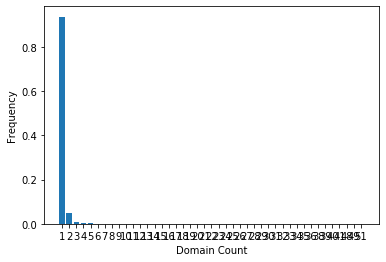

In [41]:

import matplotlib.pyplot as plt

# display(set(histogram_data["COUNT"]))

display(histogram_data)

print(len(histogram_data[histogram_data["COUNT"] == 1].values))
print(histogram_data.shape)

# histogram_data.hist(column="COUNT")



class_labels = sorted(set(histogram_data.iloc[:,-1]))
class_counts = histogram_data.iloc[:,-1].value_counts(normalize=True).sort_index()
print(class_labels)
print(class_counts)

xs = [i + 0.1 for i, _ in enumerate(class_labels)]

plt.bar(xs, class_counts)

plt.ylabel("Frequency")
plt.xlabel("Domain Count")
plt.xticks([i + 0.1 for i, _ in enumerate(class_labels)],class_labels)
plt.show()


In [42]:
display(histogram_data.shape)
one_count_domains = histogram_data[histogram_data["COUNT"] == 1]

one_count_domains = one_count_domains[0:1000000]
# .sample(n=1000000, random_state=3)

print("total sum of domain with count 1: ", sum(one_count_domains["COUNT"].values))

one_count_domains = one_count_domains.reset_index(drop=True) 
one_count_domains["ID"] = one_count_domains.index

one_count_domains

(2060024, 3)

total sum of domain with count 1:  1000000


,ID,DOMAIN,COUNT
0,0,6400.0 6400.0 6400.0 65000.0 0.0 12.62 4.0 0.0...,1
1,1,35000.0 35000.0 35000.0 125000.0 0.0 12.29 4.0...,1
2,2,5025.0 5025.0 5025.0 51605.0 0.0 12.99 4.0 10....,1
3,3,20000.0 20000.0 20000.0 77000.0 0.0 15.99 4.0 ...,1
4,4,12000.0 12000.0 12000.0 32000.0 0.0 18.06 6.0 ...,1
...,...,...,...
999995,999995,8000.0 8000.0 8000.0 60000.0 0.0 15.59 6.0 4.0...,1
999996,999996,12000.0 12000.0 12000.0 72800.0 0.0 8.99 2.0 3...,1
999997,999997,7000.0 7000.0 7000.0 50000.0 0.0 19.92 6.0 2.0...,1
999998,999998,2000.0 2000.0 2000.0 85176.0 0.0 11.99 2.0 10....,1


In [43]:
display(histogram_data.shape)
one_count_domains = histogram_data[histogram_data["COUNT"] == 1]

# one_count_domains = one_count_domains[0:1000000]
# # .sample(n=1000000, random_state=3)

# print("total sum of domain with count 1: ", sum(one_count_domains["COUNT"].values))

# one_count_domains = one_count_domains.reset_index(drop=True) 
# one_count_domains["ID"] = one_count_domains.index

one_count_domains

(2060024, 3)

,ID,DOMAIN,COUNT
132263,132263,6400.0 6400.0 6400.0 65000.0 0.0 12.62 4.0 0.0...,1
132264,132264,35000.0 35000.0 35000.0 125000.0 0.0 12.29 4.0...,1
132265,132265,5025.0 5025.0 5025.0 51605.0 0.0 12.99 4.0 10....,1
132266,132266,20000.0 20000.0 20000.0 77000.0 0.0 15.99 4.0 ...,1
132267,132267,12000.0 12000.0 12000.0 32000.0 0.0 18.06 6.0 ...,1
...,...,...,...
2060019,2060019,16000.0 16000.0 16000.0 76800.0 0.0 9.93 2.0 1...,1
2060020,2060020,30000.0 30000.0 30000.0 150000.0 1.0 16.49 6.0...,1
2060021,2060021,2800.0 2800.0 2800.0 90000.0 0.0 7.49 1.0 10.0...,1
2060022,2060022,20300.0 20300.0 20300.0 55000.0 0.0 21.45 6.0 ...,1


In [36]:
# histogram_data.to_csv("histogram_data.csv",index=False)

one_count_domains.to_csv("unique_domains_2.csv",index=False)

NameError: name 'one_count_domains' is not defined

In [25]:
known_data = pd.read_csv("./unique_domains.csv", sep=",")
print(known_data.shape)
known_data.head()

(1000000, 3)


,ID,DOMAIN,COUNT
0,0,5000 5000 5000 180000.0 0 11.99 B 8 years 0 MO...,1
1,1,12000 12000 12000 76000.0 0 11.44 B 3 years 1 ...,1
2,2,5000 5000 5000 16800.0 0 16.14 C 3 years 0 RENT,1
3,3,20000 20000 20000 110000.0 1 10.47 B 1 year 1 ...,1
4,4,2500 2500 2500 85000.0 0 14.47 C 10+ years 2 M...,1


In [29]:
known_data = known_data.sample(frac=0.001, random_state=3)
# known_data.to_csv("known_domains.csv",index=False)

In [30]:
known_domain = known_data.iloc[:, 0:2]

In [28]:
known_domain.to_csv("known_domains.csv",index=False)